In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import os
import xml.etree.ElementTree as ET
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
!unzip -u "/content/drive/MyDrive/archive.zip" -d "/content/data"

Archive:  /content/drive/MyDrive/archive.zip
  inflating: /content/data/annotations/maksssksksss0.xml  
  inflating: /content/data/annotations/maksssksksss1.xml  
  inflating: /content/data/annotations/maksssksksss10.xml  
  inflating: /content/data/annotations/maksssksksss100.xml  
  inflating: /content/data/annotations/maksssksksss101.xml  
  inflating: /content/data/annotations/maksssksksss102.xml  
  inflating: /content/data/annotations/maksssksksss103.xml  
  inflating: /content/data/annotations/maksssksksss104.xml  
  inflating: /content/data/annotations/maksssksksss105.xml  
  inflating: /content/data/annotations/maksssksksss106.xml  
  inflating: /content/data/annotations/maksssksksss107.xml  
  inflating: /content/data/annotations/maksssksksss108.xml  
  inflating: /content/data/annotations/maksssksksss109.xml  
  inflating: /content/data/annotations/maksssksksss11.xml  
  inflating: /content/data/annotations/maksssksksss110.xml  
  inflating: /content/data/annotations/maksssk

In [ ]:
class_dict = {"mask_weared_incorrect": 0, "with_mask": 1, "without_mask": 2}

def create_dataset_from_annotations(image_folder, xml_folder):
    dataset = []
    labels = []

    for xml_file in os.listdir(xml_folder):
        if not xml_file.endswith('.xml'): continue

        tree = ET.parse(os.path.join(xml_folder, xml_file))
        root = tree.getroot()

        image_file = root.find('filename').text
        img = cv2.imread(os.path.join(image_folder, image_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        for member in root.findall('object'):
            label = member.find('name').text
            bndbox = member.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)

            face = img[ymin:ymax, xmin:xmax]
            face = cv2.resize(face, (224, 224))
            face = face / 255.
            dataset.append(face)
            labels.append(class_dict[label])

    return np.array(dataset), np.array(labels)

In [ ]:
image_folder = '/content/data/images'
xml_folder = '/content/data/annotations'
dataset, labels = create_dataset_from_annotations(image_folder, xml_folder)

In [ ]:
incorectly=0
corectly=0
without=0
sum=0
for label in labels:
  sum+=1
  if(label==0):
    incorectly+=1
  elif(label==1):
    corectly+=1
  elif(label==2):
    without+=1

print(f'Number of objects: {sum}\n')
print(f'Number of incorectly: {incorectly}\n')
print(f'Number of corectly: {corectly}\n')
print(f'Number of without: {without}\n')

Number of objects: 4072

Number of incorectly: 123

Number of corectly: 3232

Number of without: 717



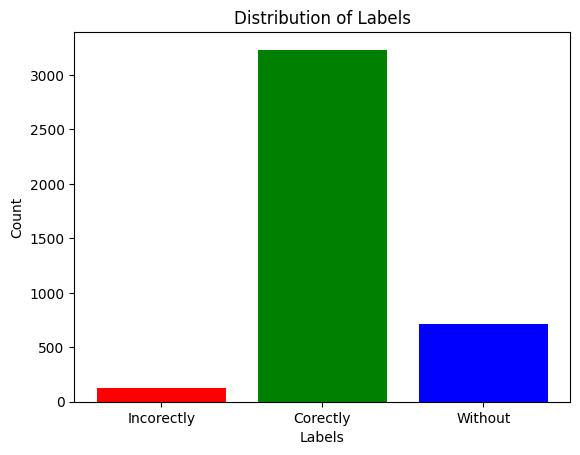

In [ ]:

labels = ['Incorectly', 'Corectly', 'Without']
values = [incorectly, corectly, without]

fig, ax = plt.subplots()
ax.bar(labels, values, color=['red', 'green', 'blue'])

ax.set_xlabel('Labels')
ax.set_ylabel('Count')
ax.set_title('Distribution of Labels')

plt.show()


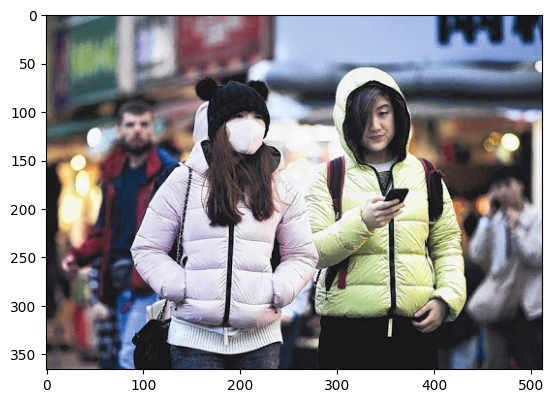

In [ ]:
img = plt.imread('/content/data/images/maksssksksss0.png')
plt.imshow(img)

2


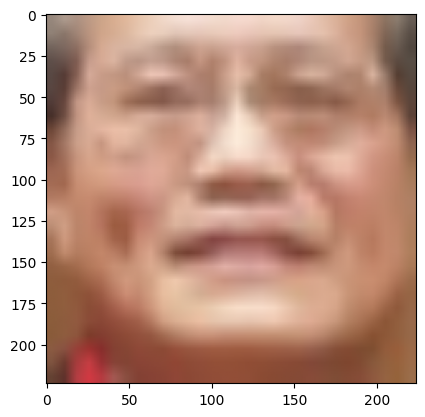

In [ ]:
plt.imshow(dataset[1])
print(labels[1])

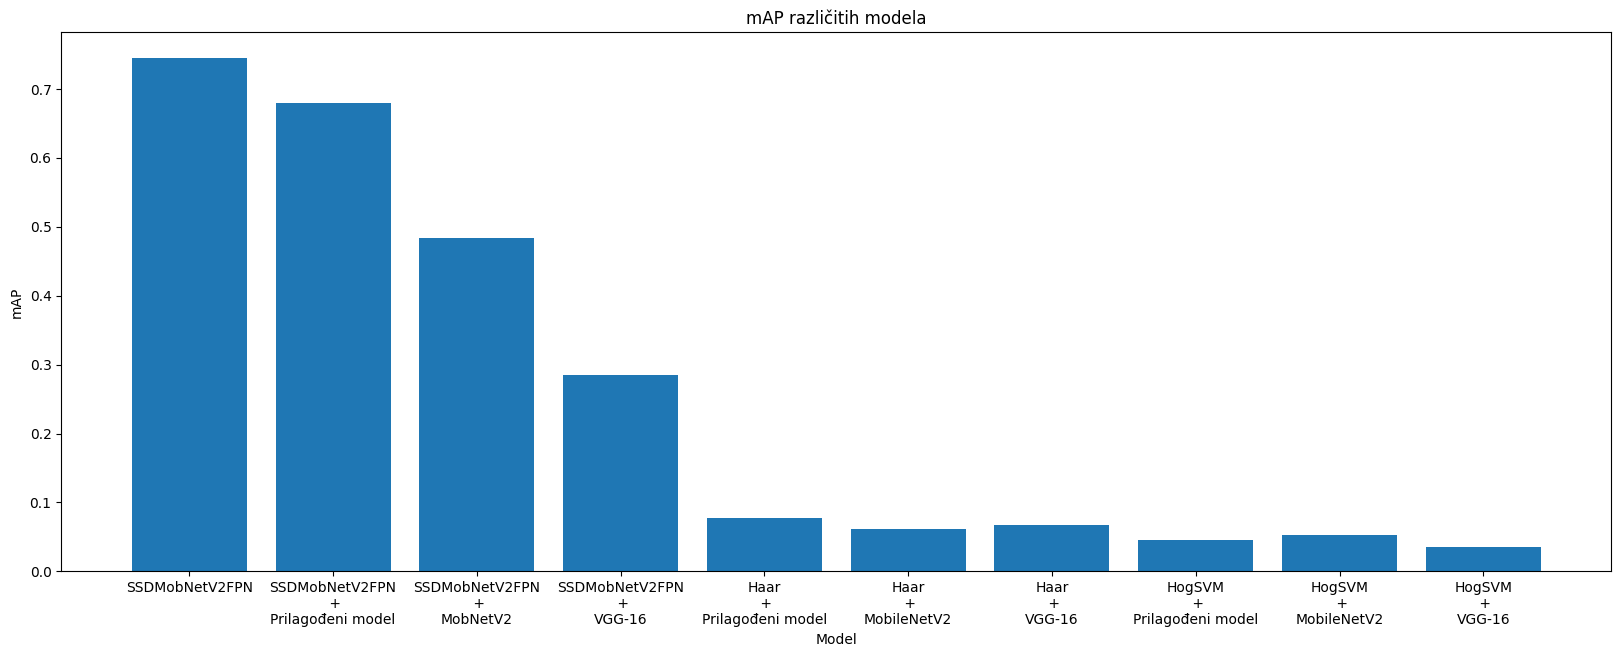

In [ ]:
vals = [0.745, 0.680, 0.484, 0.285, 0.077, 0.062, .067, .046, 0.053, 0.035]
labels = ['SSDMobNetV2FPN', 'SSDMobNetV2FPN\n +\nPrilagođeni model', 'SSDMobNetV2FPN\n +\nMobNetV2', 'SSDMobNetV2FPN\n +\nVGG-16'
, 'Haar\n +\nPrilagođeni model', 'Haar\n +\nMobileNetV2', 'Haar\n +\nVGG-16'
, 'HogSVM\n +\nPrilagođeni model', 'HogSVM\n +\nMobileNetV2', 'HogSVM\n +\nVGG-16']

plt.figure(figsize=(20,7))
plt.bar(labels, vals)

plt.title('mAP različitih modela')
plt.xlabel('Model')
plt.ylabel('mAP')

plt.show()


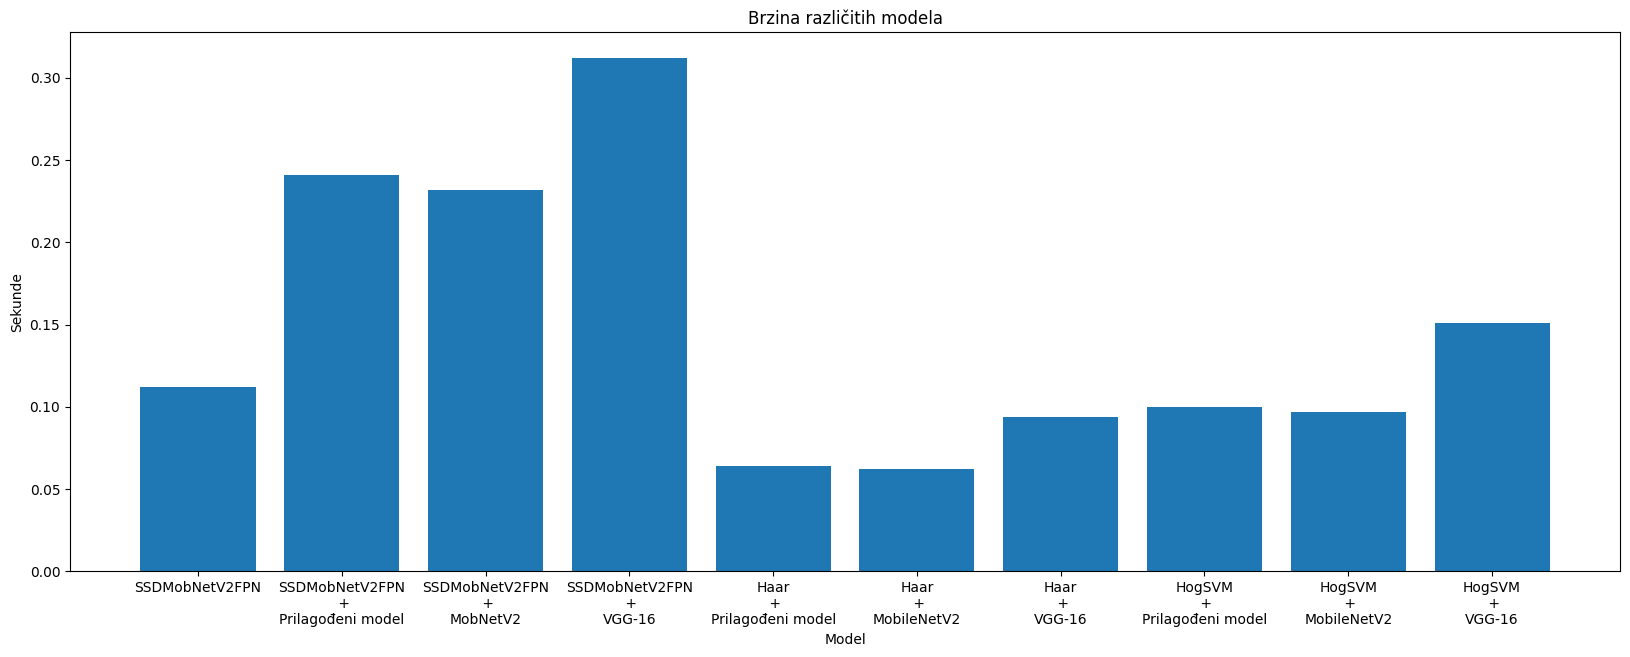

In [ ]:
vals = [0.112, 0.241, 0.232, 0.312, 0.064, 0.062, .094, 0.1, 0.097, 0.151]
labels = ['SSDMobNetV2FPN', 'SSDMobNetV2FPN\n +\nPrilagođeni model', 'SSDMobNetV2FPN\n +\nMobNetV2', 'SSDMobNetV2FPN\n +\nVGG-16'
, 'Haar\n +\nPrilagođeni model', 'Haar\n +\nMobileNetV2', 'Haar\n +\nVGG-16'
, 'HogSVM\n +\nPrilagođeni model', 'HogSVM\n +\nMobileNetV2', 'HogSVM\n +\nVGG-16']

plt.figure(figsize=(20,7))
plt.bar(labels, vals)

plt.title('Brzina različitih modela')
plt.xlabel('Model')
plt.ylabel('Sekunde')

plt.show()
